In [17]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'wlcstat-master')))

import wlcstat.chromo

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'stochastic-gene-conf-master')))

from stochastic_gene_conf import gene_conf
from stochastic_gene_conf import gene_analysis

figure_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'subfigures/'))

import numpy as np
import numpy.matlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import pickle
from scipy import sparse

# Regular & Uniform Spacing Models

In [12]:
links = np.arange(30,91,1).astype(int)
sigs = np.array([0,10]).astype(int)

gene_name = "MODEL10K"
exp_name = "NULL"
datadir = 'D:/Polymer_Data/Models/'

data_mean = np.zeros([len(links),len(sigs),10000-2])
rog_mean = np.zeros([len(links),len(sigs),1000])
r2_mean = np.zeros([len(links),len(sigs),1000])
# rog_var = np.zeros([len(links),len(sigs)])

for ix in range(len(links)):
    for jx in range(len(sigs)):
        full_file = datadir+str(links[ix])+'_'+str(sigs[jx])+'/'+gene_name+'/'+exp_name
        files = os.listdir(full_file)
        
        with open(full_file+'/'+'variables.pkl', 'rb') as file:
            location, signal, Gene_start, Gene_end, TSS_vec, cdf, half_wrap = pickle.load(file)

        flag = True
        idx = 0 
        tss_idx = TSS_vec[0];
        for i in range(len(files)):
            strtemp = files[i]
            if strtemp[0] != 'v':
                with open(full_file+'/'+strtemp, 'rb') as file:
                        tss_contact_temp, rogtemp, r2temp = pickle.load(file)
                        tss_contact_temp = sparse.csc_matrix.todense(tss_contact_temp)
                        tss_contact_temp = np.array(tss_contact_temp)
                        tss_contact_temp = tss_contact_temp[0]
                if flag:
                    N = 0
                    rog = np.zeros(len(files)-1)
                    r2 = np.zeros(len(files)-1)
                    tss_contact = np.zeros(len(tss_contact_temp))
                    flag = False
                rog[idx] = np.sqrt(rogtemp)
                r2[idx] = r2temp
                tss_contact = tss_contact+tss_contact_temp
                N += 1
                # sys.stdout.flush()
                idx += 1
                # print(str((idx)/(len(files)-1)), end='\r')
        if ix ==0 and jx == 0:
            # print(np.unique(tss_contact_temp))
            x = location[:-1]
            xplot = x/1e3-x[tss_idx]/1e3


        data_mean[ix,jx,:] = tss_contact/N
        rog_mean[ix,jx,:] = rog
        r2_mean[ix,jx,:] = r2
        # rog_mean[ix,jx] = np.mean(rog)
        # rog_var[ix,jx] = np.var(rog)

        # print("Complete!            ")
data_mean_archive = np.copy(data_mean)

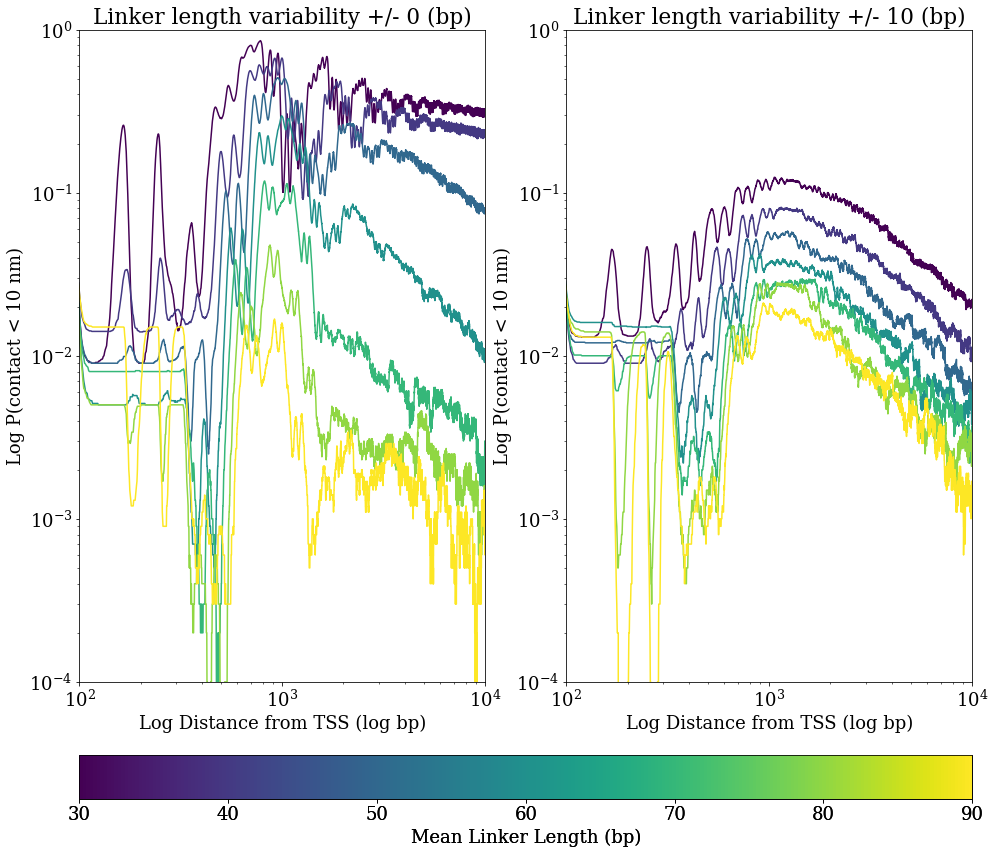

In [18]:
plt.figure(figsize=(16,12))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

for jx in range(len(sigs)):
    plt.subplot(1,2,int(jx+1))
    c = iter(plt.cm.viridis(np.linspace(0,1,len(links))))
    for ix in range(len(links)):
        alpha = next(c)
        if np.mod(links[ix],10)==0:
            plt.plot(x,data_mean_archive[ix,jx,:],'-',color=alpha)
    plt.xlim([1e2,1e4])
    plt.ylim([1e-4,1e0])
    plt.yscale('log')
    plt.xscale('log')
    plt.title("Linker length variability +/- "+str(sigs[jx])+" (bp)")
    plt.xlabel('Log Distance from TSS (log bp)')
    plt.ylabel('Log P(contact < 10 nm)')
    
    cax = plt.axes([0.125, -0.01, 0.775, 0.05])
    cmappable = ScalarMappable(Normalize(links[0],links[-1]),cmap='viridis')
    plt.colorbar(cmappable,cax=cax,orientation='horizontal')
    plt.xlabel('Mean Linker Length (bp)')

plt.draw()
plt.savefig(figure_path + r"unifrom_pcontact_curves.pdf", transparent=True)

plt.show()

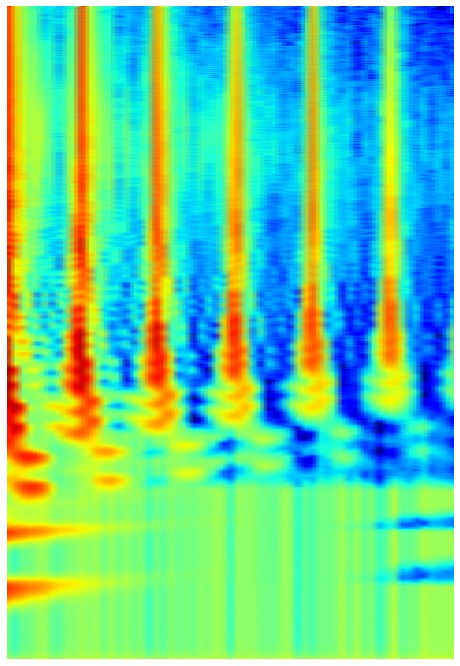

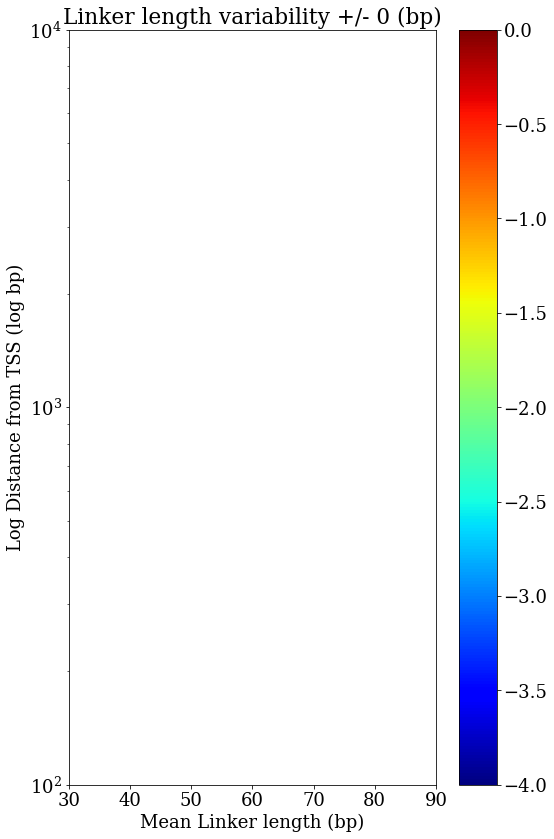

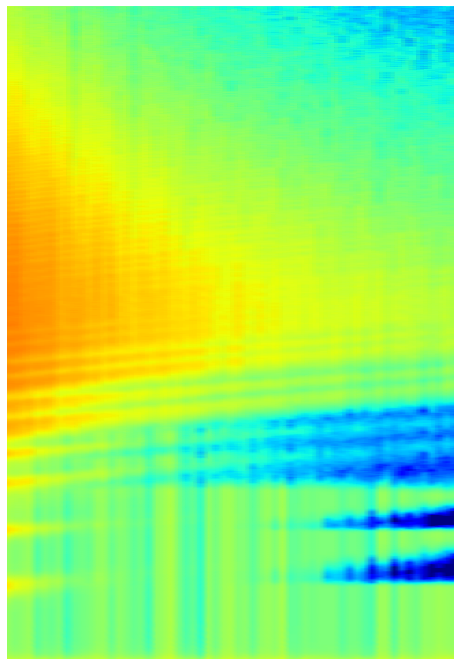

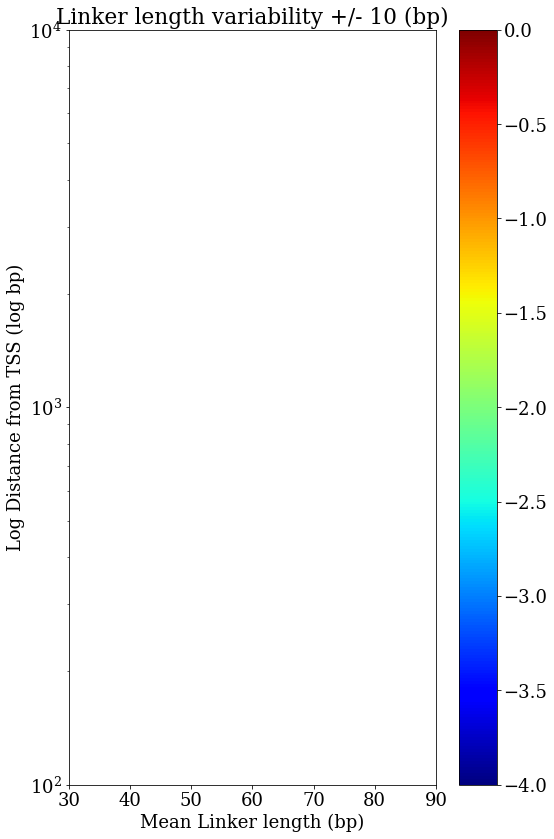

In [19]:
X,Y = np.meshgrid(links,x)
plt.figure(figsize=(8,12))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

jx = 0

plt.pcolormesh(X,Y,np.log10(data_mean_archive[:,jx,:].T+1e-16),shading='gouraud',cmap='jet')

plt.ylim([1e2,1e4])
plt.yscale('log')
plt.clim([-4,0])

plt.draw()
plt.axis('off')
plt.savefig(figure_path + r"regular_heatmap.png", bbox_inches='tight')

plt.show()

plt.figure(figsize=(8,12))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

jx = 0

plt.ylim([1e2,1e4])
plt.xlim([30,90])
plt.yscale('log')

plt.title("Linker length variability +/- "+str(sigs[jx])+" (bp)")
plt.xlabel('Mean Linker length (bp)')
plt.ylabel('Log Distance from TSS (log bp)')


cmappable = ScalarMappable(Normalize(-4.0,0.0),cmap='jet')
plt.colorbar(cmappable,orientation='vertical')
plt.tight_layout()

plt.draw()
plt.savefig(figure_path + r"regular_heatmap_axes.pdf", transparent=True)

plt.show()

plt.figure(figsize=(8,12))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

jx = 1

plt.pcolormesh(X,Y,np.log10(data_mean_archive[:,jx,:].T+1e-16),shading='gouraud',cmap='jet')

plt.ylim([1e2,1e4])
plt.yscale('log')
plt.clim([-4,0])

plt.draw()
plt.axis('off')
plt.savefig(figure_path + r"uniform_heatmap.png", bbox_inches='tight')

plt.show()

plt.figure(figsize=(8,12))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

jx = 1

plt.ylim([1e2,1e4])
plt.xlim([30,90])
plt.yscale('log')

plt.title("Linker length variability +/- "+str(sigs[jx])+" (bp)")
plt.xlabel('Mean Linker length (bp)')
plt.ylabel('Log Distance from TSS (log bp)')


cmappable = ScalarMappable(Normalize(-4.0,0.0),cmap='jet')
plt.colorbar(cmappable,orientation='vertical')
plt.tight_layout()

plt.draw()
plt.savefig(figure_path + r"uniform_heatmap_axes.pdf", transparent=True)

plt.show()

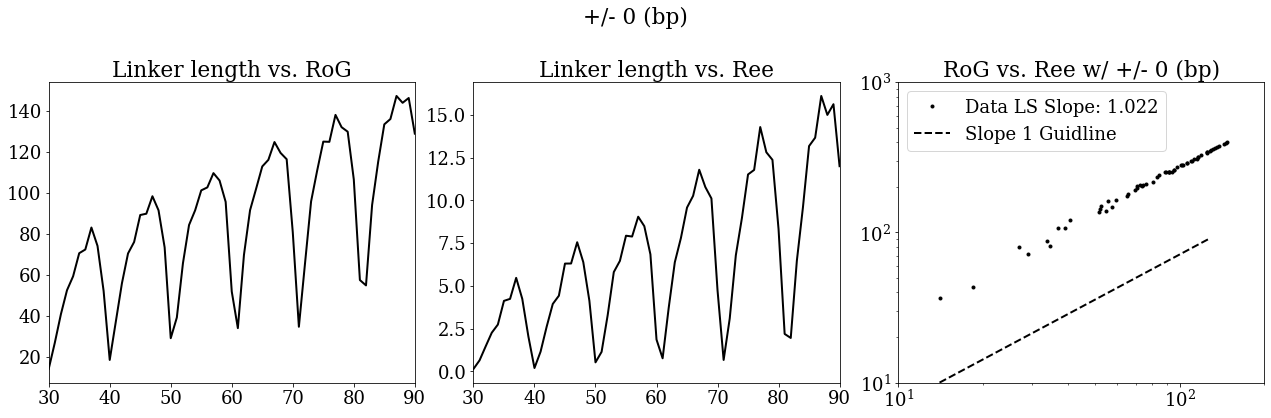

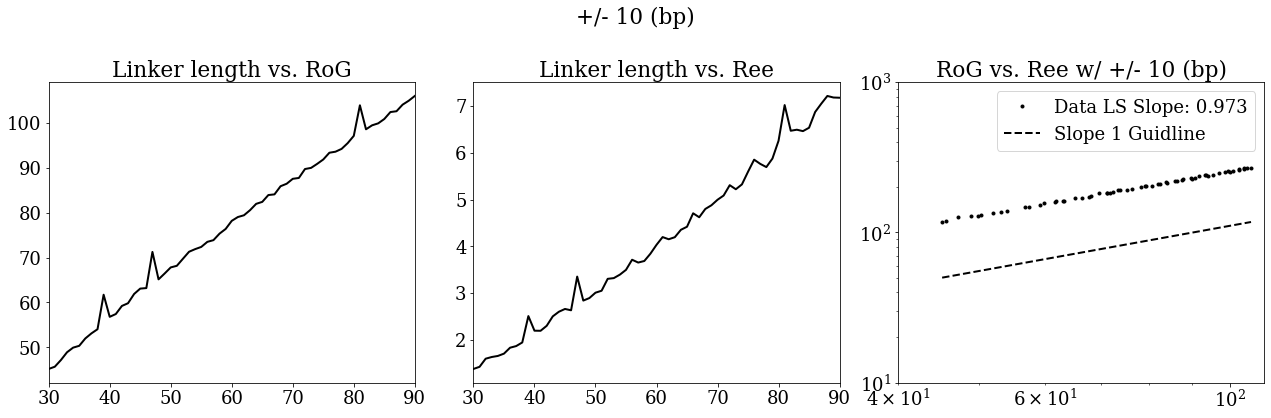

In [21]:
L0 = Gene_end-Gene_start
rog_means = np.zeros((len(sigs),len(links)))
khun_means = np.zeros((len(sigs),len(links)))

for jx in range(len(sigs)):
    for ix in range(len(links)):
        rog_means[jx,ix] = np.mean(rog_mean[ix,jx,:].T)
        khun_means[jx,ix] = np.mean(r2_mean[ix,jx,:].T/L0)

for jx in range(len(sigs)):
    plt.figure(figsize=(18,6))
    font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
    plt.rc('font', **font)

    plt.subplot(1,3,1)
    plt.plot(links,rog_means[jx,:],'k-',linewidth=2)
    plt.xlim([30,90])
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.ylim([0,150])
    plt.title('Linker length vs. RoG')

    plt.subplot(1,3,2)
    plt.plot(links,khun_means[jx,:],'k-',linewidth=2)
    plt.xlim([30,90])
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.ylim([0,16])
    plt.title('Linker length vs. Ree')
    
    x = np.log10(rog_means[jx,:])
    y = np.log10(np.sqrt(khun_means[jx,:]*L0))

    A = np.vstack([x, np.ones(len(x))]).T

    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    
    plt.subplot(1,3,3)
    # plt.plot(rog_means[jx,:],khun_means[jx,:],'k.',label = 'Data LS Slope: '+str(np.round(m,3)),linewidth=2)
    plt.plot(rog_means[jx,:],np.sqrt(khun_means[jx,:]*L0),'k.',label = 'Data LS Slope: '+str(np.round(m,3)),linewidth=2)
    plt.plot(np.array([rog_means[jx,0],rog_means[jx,-1]]),(10+4*sigs[jx])*np.array([rog_means[jx,0],rog_means[jx,-1]])/rog_means[jx,0],'k--',label='Slope 1 Guidline',linewidth=2)
    # plt.xlim([(10+4*sigs[jx]),200])
    # plt.ylim([5,1000])
    plt.xscale('log')
    plt.yscale('log')
    if sigs[jx] == 0:
        plt.xlim([10,200])
    else:
        plt.xlim([40,110])
    plt.ylim([10,10**3])
    plt.title('RoG vs. Ree w/ +/- '+str(sigs[jx]) + ' (bp)')
    plt.legend()

    plt.suptitle("+/- "+str(sigs[jx])+" (bp)")

    plt.tight_layout()
    plt.draw()
    if jx == 0:
        plt.savefig(figure_path + r"regular_rog_Ree.pdf", transparent=True)
    else:
        plt.savefig(figure_path + r"uniform_rog_Ree.pdf", transparent=True)
    plt.show()

# Poisson Spacing Model

In [22]:
gene_name = "MODEL10K"
datadir = 'D:/Polymer_Data/'
exp_name = "NULL"

files = os.listdir(datadir+gene_name+'/'+exp_name)

with open(datadir+gene_name+'/'+exp_name+'/'+'variables.pkl', 'rb') as file:
    temp = pickle.load(file)
    location = temp[0]
    signal = temp[1]
    Gene_start = temp[2]
    Gene_end = temp[3]
    TSS_vec = temp[4]
    accessible_starts = temp[5]
    accessible_ends = temp[6]
    cdf = temp[7]
    half_wrap = temp[8]
    
N_files = 50000

if N_files >= len(files):
    N_files = int(len(files))-1

tss_contact_mat = np.zeros([len(location)-1,61])
packed_link_array = np.zeros(N_files)
khun_array = np.zeros(61)
rog_array = np.zeros(61)
packed_link_N = np.zeros(61)

for i in range(N_files):

    strtemp = files[i]
    if strtemp[0] != 'v':
        with open(datadir+gene_name+'/'+exp_name+'/'+strtemp, 'rb') as file:
            [tss_contact_temp,rog_mean,r2_mean,packed_link]  = pickle.load(file)
            tss_contact_temp = np.array(sparse.csc_matrix.todense(tss_contact_temp[0]))[0]

            tss_contact_mat[:,packed_link-30] = tss_contact_mat[:,packed_link-30] + tss_contact_temp
            packed_link_array[i] = packed_link
            khun_array[packed_link-30] = khun_array[packed_link-30] + r2_mean/(Gene_end-Gene_start)
            rog_array[packed_link-30] = rog_array[packed_link-30] + rog_mean
            packed_link_N[packed_link-30] += 1
            
for j in range(len(packed_link_N)):
    tss_contact_mat[:,j] = tss_contact_mat[:,j]/packed_link_N[j]
    khun_array[j] = khun_array[j]/packed_link_N[j]
    rog_array[j] = rog_array[j]/packed_link_N[j]

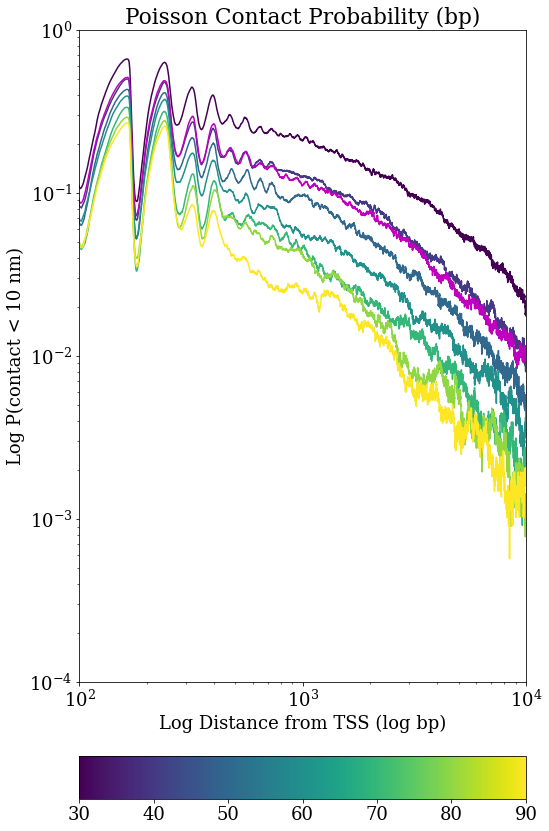

In [24]:
plt.figure(figsize=(8,12))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

c = iter(plt.cm.viridis(np.linspace(0,1,len(links))))
for ix in range(len(links)):
    alpha = next(c)
    if np.mod(links[ix],10)==0:
        plt.plot(location[0:-1],tss_contact_mat[:,ix],'-',color=alpha)
    if links[ix] == 42:
        plt.plot(location[0:-1],tss_contact_mat[:,ix],'m-')

plt.xlim([1e2,1e4])
plt.ylim([1e-4,1e0])
plt.yscale('log')
plt.xscale('log')

plt.title("Poisson Contact Probability (bp)")
plt.xlabel('Log Distance from TSS (log bp)')
plt.ylabel('Log P(contact < 10 nm)')

cax = plt.axes([0.125, -0.01, 0.775, 0.05])
cmappable = ScalarMappable(Normalize(30,90),cmap='viridis')
plt.colorbar(cmappable,cax=cax,orientation='horizontal')

# plt.tight_layout()
plt.draw()
plt.savefig(figure_path + r"pcontact_curves.pdf", transparent=True)
plt.show()

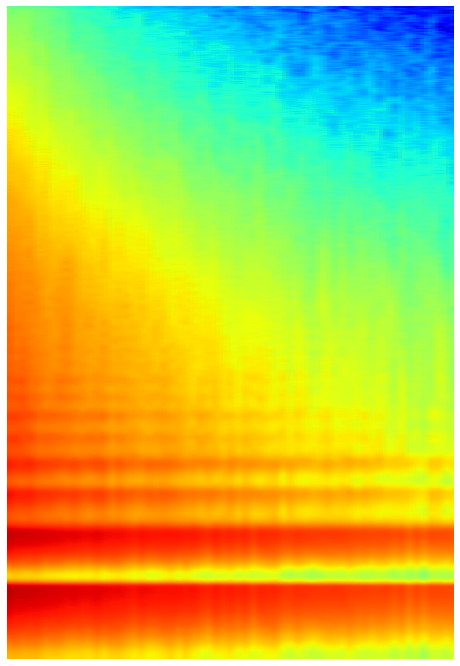

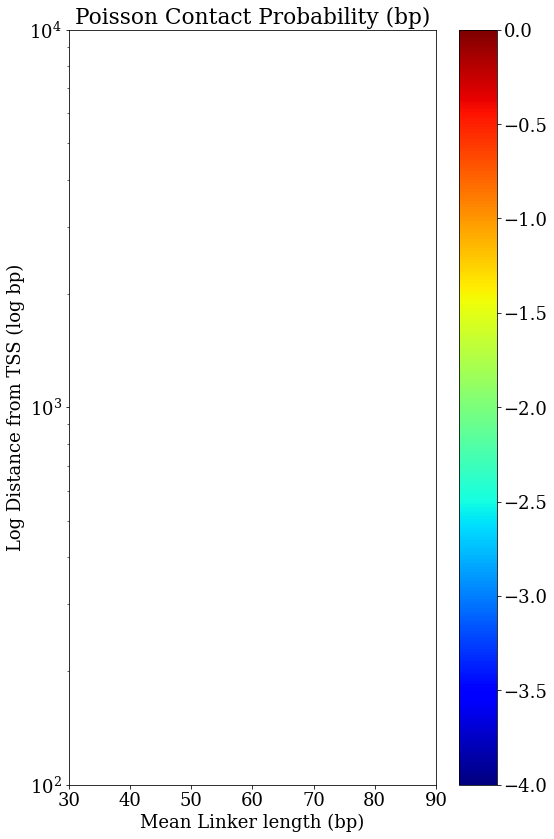

In [23]:
links = np.arange(30,91,1)
X,Y = np.meshgrid(links,location[0:-1])
plt.figure(figsize=(8,12))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

plt.pcolormesh(np.array(X),np.array(Y),np.array(np.log10(tss_contact_mat+1e-16)),shading='gouraud',cmap='jet')
plt.ylim([1e2,1e4])
plt.yscale('log')

plt.draw()
plt.axis('off')
plt.savefig(figure_path + r"poisson_heatmap.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,12))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

plt.ylim([1e2,1e4])
plt.xlim([30,90])
plt.yscale('log')



plt.title("Poisson Contact Probability (bp)")
plt.xlabel('Mean Linker length (bp)')
plt.ylabel('Log Distance from TSS (log bp)')

cmappable = ScalarMappable(Normalize(-4.0,0.0),cmap='jet')
plt.colorbar(cmappable,orientation='vertical')
plt.tight_layout()

plt.draw()
plt.savefig(figure_path + r"poisson_heatmap_axes.pdf", transparent=True)
plt.show()

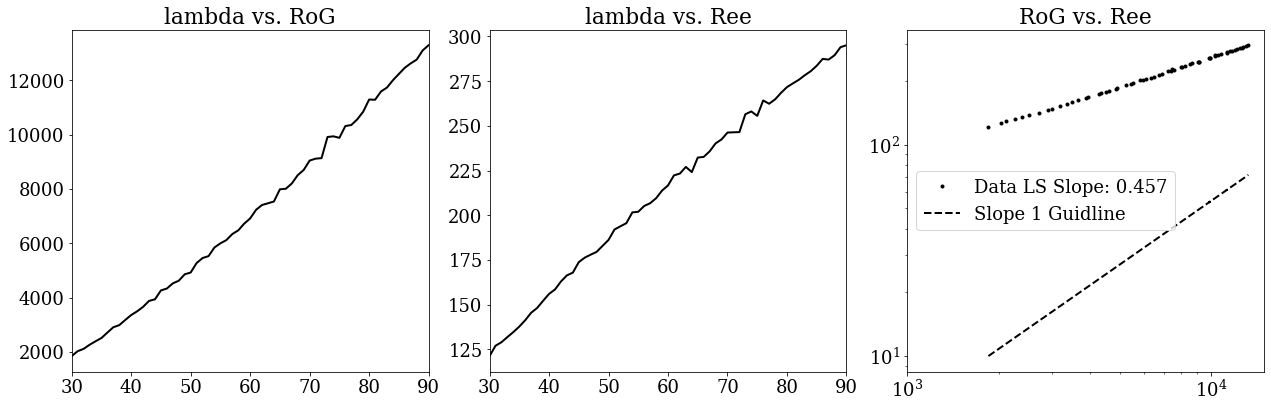

In [25]:
L0 = Gene_end-Gene_start

plt.figure(figsize=(18,6))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 18}
plt.rc('font', **font)

plt.subplot(1,3,1)
plt.plot(links,rog_array,'k-',linewidth=2)
plt.xlim([30,90])
plt.title('lambda vs. RoG')

plt.subplot(1,3,2)
plt.plot(links,np.sqrt(khun_array*L0),'k-',linewidth=2)
plt.xlim([30,90])
plt.title('lambda vs. Ree')


x = np.log10(rog_array)
y = np.log10(np.sqrt(khun_array*L0))

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.subplot(1,3,3)
plt.plot(rog_array,np.sqrt(khun_array*L0),'k.',label = 'Data LS Slope: '+str(np.round(m,3)),linewidth=2)
plt.plot(rog_array,10*rog_array/rog_array[0],'k--',label='Slope 1 Guidline',linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e3,1.5e4])
plt.title('RoG vs. Ree')
plt.legend()

plt.tight_layout()
plt.draw()
plt.savefig(figure_path + r"poisson_rog_ree.pdf", transparent=True)
plt.show()